<a href="https://colab.research.google.com/github/S-geethika/Python_ML_Codes/blob/main/Assignment_6_Submission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

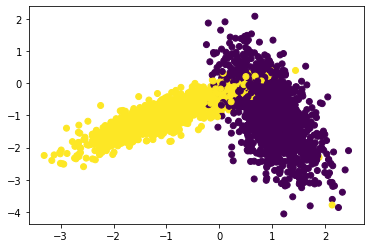

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [101]:


def RandomSearchCV(x_train,y_train,classifier, params, folds):
  trainscores = []
  testscores  = [] 

  ind_div=np.split(np.arange(len(x_train)),folds)
  for k in params['n_neighbors']:
    
        #print(k)
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            test_indices = ind_div[j]
            train_indices  = list(set(list(range(1, len(x_train)))) - set(list(test_indices)))
           # print("j,train indices",j,train_indices)
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(x_train,y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
  return trainscores,testscores


[24, 15, 26, 39, 17, 28, 31, 33, 22, 20]
[0.957327652197106, 0.9569275855171034, 0.9563942121757685, 0.9573276655331067, 0.957861052210442, 0.9562608788424352, 0.9562608521704341, 0.9563942121757685, 0.9573276388611056, 0.9578610655464427]
[0.9573333333333333, 0.9569333333333333, 0.9564, 0.9573333333333333, 0.9578666666666668, 0.9562666666666667, 0.9562666666666667, 0.9564, 0.9573333333333333, 0.9578666666666665]


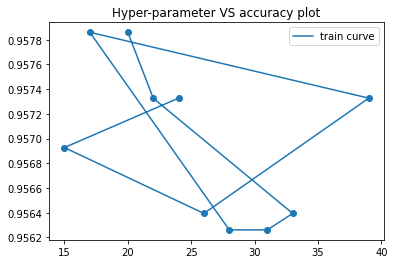

In [108]:
import operator
classifier = KNeighborsClassifier()
#reference - https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
param_range=(15,50)
folds = 3
#params = {'n_neighbors':np.random.randint(param_range[0],param_range[1],10)}

params = {'n_neighbors':random.sample(range(param_range[0],param_range[1]),10)}

trainscores,testscores = RandomSearchCV(x_train,y_train,classifier, params, folds)
print(params['n_neighbors'])

print(trainscores)
print(testscores)
plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.scatter(params['n_neighbors'], trainscores)
#,c=y_test)
#plt.plot(params['n_neighbors'],testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Observations/Inferences
1.   The train and test scores are same, so there is overlap inthe plots and we see only one plot.

2.   Since the params are randomly generated, they are not in order, so the curve is not very clear.  I represented values as scatter plot.



**Note**
*   for K=17 - Accuracy is  0.957861052210442 
*   for K=22, Accuracy is 0.9578610655464427

I will plot decision boundary for both K=17 and 22






In [74]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

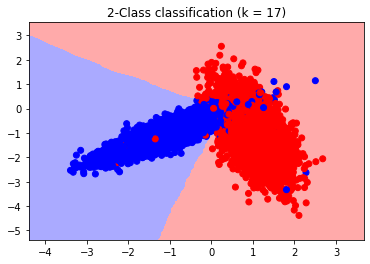

In [109]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 17)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)

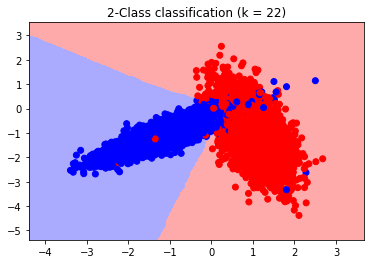

In [110]:
neigh = KNeighborsClassifier(n_neighbors =22)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)